# PC Lab 1

## Task #1 :Import the data and describe the sample

In [3]:
# Loading in csv with pandas

import pandas as pd

df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab1_Stock.csv")

print(df)

            Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        s

In [4]:
# Checking the data types
print(df.info())
'''
Date, is an object. For the sake of visualization we will transform it to a date object. 

'''

# Transforming date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df['Date'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB
None
datetime64[ns]


In [5]:
# Sort the stock data by date and print the number of stocks
df_sorted = df.sort_values(by='Date')

print(df_sorted)
    # Note: I do not think anything changed as the stock data seem to be in ascending order of dates. 

duplicates = df_sorted.duplicated().any()
print(f"Number of duplicate rows: {duplicates}")
# Note that there are no duplicates in the dataset.

# Print number of stocks.
num_stocks = df_sorted.columns[1:].nunique()
print(f"Number of unique stocks: {num_stocks}")

'''
Note to print the number of stocks, we first take only the columns after first (which is the Date) so we only have the 
stocks. Then we take the nunique() function to count the unique stocks to get the number of stocks. Here, there are 9
unique stocks. AAPL, BA, T, MGM, Amazon, IBM, Tesla, Google, and SP500. 

'''
# Check if data contains any null values
df.isnull().values.any()

           Date        AAPL          BA          T        MGM         AMZN  \
0    2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1    2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2    2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3    2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4    2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...         ...         ...         ...        ...        ...          ...   
2154 2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155 2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156 2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157 2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158 2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0    

False

Based on the data exploration so far, there are no duplicates or missing values in the dataset, indicating that the datset is complete. In general it seems that the dataset contains either an index or asset price for each date given.

In [7]:
# What is the average market value of the S&P500?

mean_sp500 = df_sorted['sp500'].mean()
print(mean_sp500)

'''
The average market value can be defined as the average price of an asset (in this case the S&P 500). This can be
calculated by dividing the sum of all prices by the number of prices evaluated.

The result shows that the average market value is around 2218.75. We found this value by taking the mean of all the stock
values in an 8 year period (Jan 2012 - Aug 2020)

'''

# Which stock or index has the minimum dispersion in dollar value?

# Calculate the standard deviation for each column.
std_dev = df_sorted.drop(columns='Date').std()
print(f"Standard Deviation: {std_dev}")

# Find the stock (column) with the minimum standard deviation
min_stock = std_dev.idxmin()
print(f"Minimun dispersion Stock: {min_stock}")

# Find the minimum dispersion in dollar value
min_dispersion_value = std_dev.min()
print(f"Minimun dispersion value: {min_dispersion_value}")

'''
The stock with the minimum dispersion in dollar value is stock T with a $3.207 in dispersion. Looking at the other
standard deviations we can see that it is the lowest and therefore its stock price has had the least variation and 
fluctuation in the specified 8-year period of data. This indicates that this stock is relatively stable as there is
low volatility, which indicates that there is not as big of a risk. Thus this would be a good stock to invest in
for the more risk-adverse investors and also be more attractive to them compared to stocks that fluctuate more like Amazon
($697 in std. dev.)or S&P 500 ($537 in std. dev.). 

'''

# What is the maximum price for Amazon stock over the specified time period?

max_amazon = df_sorted['AMZN'].max()
print(f"Maximum price of Amazon Stock: {max_amazon}")

'''
The maximum price for an Amazon stock over the specified time period is $3225 (assume it is in thousands). 
'''

2218.7495540592868
Standard Deviation: AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64
Minimun dispersion Stock: T
Minimun dispersion value: 3.2074898522656086
Maximum price of Amazon Stock: 3225.0


'\nThe maximum price for an Amazon stock over the specified time period is $3225 (assume it is in thousands). \n'

In [8]:
# Summary of descriptive statistics on the data
df_sorted.describe()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,2016-04-27 17:57:49.939787008,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
min,2012-01-12 00:00:00,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,2014-03-08 12:00:00,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,2016-04-28 00:00:00,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,2018-06-19 12:00:00,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,2020-08-11 00:00:00,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902
std,NaN,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727


Based on the describe() function, we can easily see the summary statistics that are needed for to give context to some values in Task 1. We have already been able to compare the minimum dispersion (risk) where we saw that stock T has the least amount of risk ($3.207490). However, we can also see that the average market value is signficantly lower at $35 (thousands?) comparative to the other stocks/indices which reach over $100 or even $2000 (as with S&P500).

Based on the table, we can see that the average market value (average of all assumed market value (prices)) for S&P 500 is $2218.75. Compared to the the average market value of other stocks, the S&P 500 index noticably has the highest average market value by a lot, with the second highest being Amazon at $915. Thus the valuation of this index is considerably higher. However, interestingly, here S&P 500 and amazon with the highest market value show a significantly higher risk (dispersion) of around $537 and $697 respectively. 
Based on these statistics, we can clearly see the risk-return tradeoff. 

The max maximum price for Amazon over this 8 year period is $3225 (thousands?) as determined previously. Giving this value a context, this is significantly higher than all other stocks and comes close to the S&P 500 index of $3386. This indicates some kind of market dominance as they are a leder in e-commerce. This is very clear as compared to more traditional companies like MGM and T (AT&T) as well as other technology stocks such as Tesla, google and apple (which reach a maximum of $1643). This indicates that comparatively Amazon and perhaps the e-commerce industry have significant current and future growth, thus having higher valuations.  

## Task #2 : Plot the data

Define a function to plot the entire dataframe
- The function takes in a dataframe as an input argument and does not return
 anything back

In [9]:
import matplotlib.pyplot as plt

# Function to take in dataframe as input argument and does not return anything back
def plot_dataframe(df):
    plt.figure(figsize=(12, 8))

    # Plot the stocks/indices (do not include Date)
    for column in df.columns[1:]:
        plt.plot(df['Date'], df[column], label=column)

    # Set the lables where date is on the x axis and plot the stock prices accordingly
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')

    # Adding a title
    plt.title('Stock Prices Over Time')

    # Create a legend with the stock names
    plt.legend()

    # Show the plot
    plt.show()


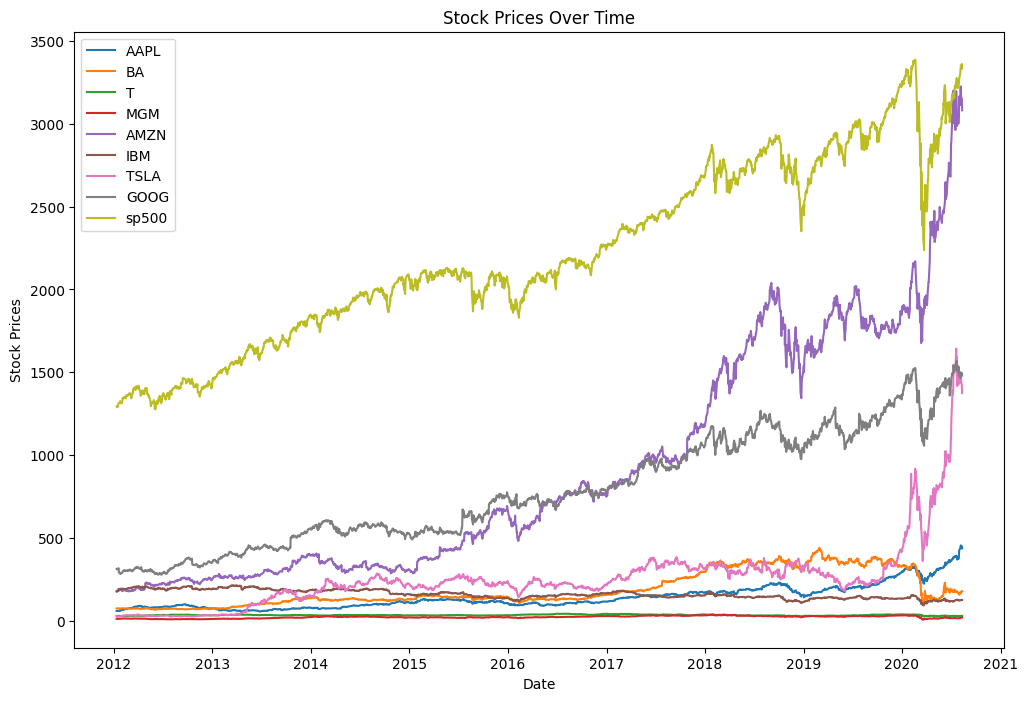

In [40]:
# Using the above function on the dataset
plot_dataframe(df_sorted)

Here we can clearly see visualized some of the patterns we described in task 1. Overall S&P 500 has the highest prices (and thus market value) comparative to all other stocks as its line is much hhigher overall across all years in the period given. Looking at just stocks, we can see that Amazon has had a very significant increase in stock price especially around 2018, and again in 2020 reflecting why the maximum price of the stock is so high compared to the other stocks as it has such a high valuation. This is similarly seen in the TESLA stock prices around 2020 (the drop in 2020 is liekly attributed to Covid-19). Moreover, we can clearly see that T and MGM have the most stable prices indicated by almost a flat line over the 8 year period indicating the least amount of risk.

Overall, the graph clearly indicates that the higher the stock price (return) the less stable and riskier the asset is most lijkely given how dramatic the fluctuation of price is for each stock, further contributing to the concept of the risk-return tradeoff. 

## Task #3 : Print out normalized (scaled) stock prices

 Define a function to normalize the prices based on the initial price
 - The function simply divides every stock by it’s price at the start date (i.e. : Date
 = 2012-01-12)
 - Plot normalized data
 - Optional : Define a function to perform an interactive data plotting using
 plotly express

In [18]:
# Defining a function to normalize price based on the initial price

import pandas as pd
import matplotlib.pyplot as plt

def normalized_price(df):
    
    df = df.set_index('Date')
    initial_price = df.loc['2012-01-12']
    normalized_data = df/initial_price
    normalized_data = normalized_data.reset_index()
    return normalized_data

In [19]:
normalized_data = normalized_price(df_sorted)
print(f"Normalized Prices based on Initial Price: {normalized_data}")

Normalized Prices based on Initial Price:            Date      AAPL        BA         T       MGM       AMZN       IBM  \
0    2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1    2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2    2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3    2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4    2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...         ...       ...       ...       ...       ...        ...       ...   
2154 2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155 2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156 2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157 2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158 2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022  

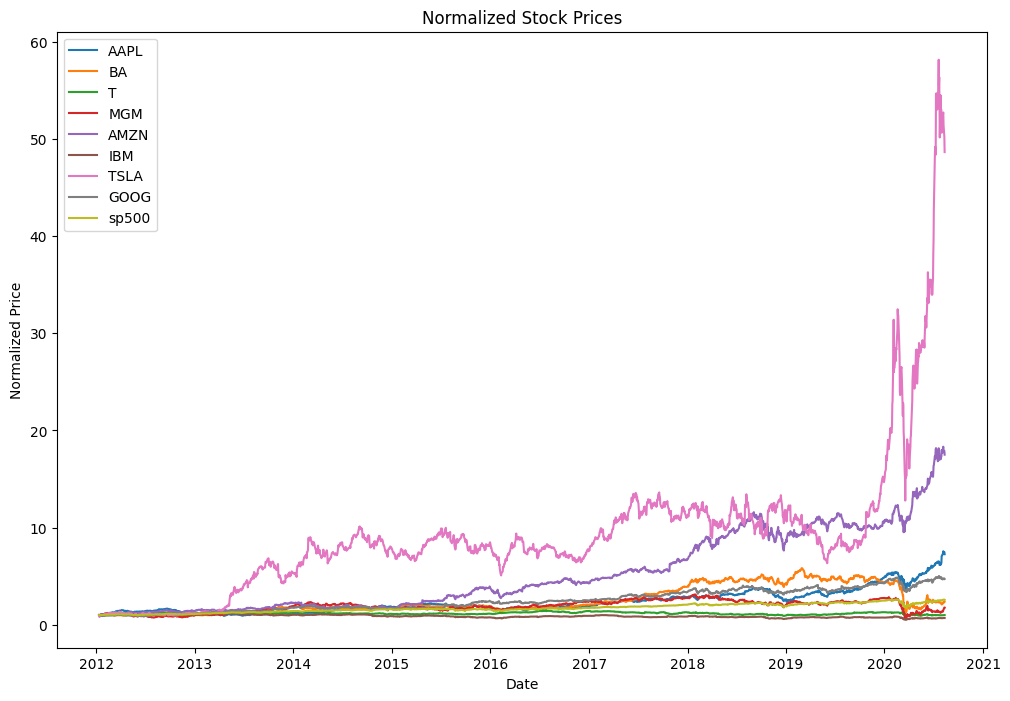

In [20]:
# Plotting Normalized Data
import matplotlib.pyplot as plt

def plot_normalized_data(df):
    plt.figure(figsize=(12,8))

    for column in df.columns[1:]:
        plt.plot(df['Date'], df[column], label=column)
        
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.title('Normalized Stock Prices')
    plt.legend()
    plt.show()

plot_normalized_data(normalized_data)


Somehow compare this to before

## Task #5 : Calculate stock returns

### 1 calculate stocks daily returns (for all stocks)

In [35]:
# Function to calculate daily stock returns
def daily_returns(df):
    # Drop the 'Date' column to perform calculations on stock prices
    df_stocks = df.drop(columns='Date')
    
    # Create a new DataFrame to store the daily returns
    df_daily_returns = pd.DataFrame(index=df.index)

    # Loop through each stock
    for stock in df_stocks.columns:
        daily_stock_returns = []

        # Loop though each row belonging to the stock
        for p in range(1, len(df_stocks)):
            price_today = df_stocks[stock].iloc[p]
            price_yesterday = df_stocks[stock].iloc[p-1]
            daily_return = (price_today - price_yesterday)/price_yesterday * 100
            daily_stock_returns.append(daily_return)

        df_daily_returns[stock] = [float('nan')] + daily_stock_returns
    
    # Include the 'Date' column for plotting
    df_daily_returns['Date'] = df['Date']
    
    return df_daily_returns

Daily returns = (price today - price yesterday)/price yesterday * 100

In [36]:
df_daily_returns = daily_returns(df_sorted)
print(f"Daily returns for all stocks: {df_daily_returns}")

Daily returns for all stocks:           AAPL        BA         T        MGM      AMZN       IBM       TSLA  \
0          NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1    -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869 -19.327430   
2     1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852  16.717854   
3     1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   0.789470   
4    -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752  -0.186494   
...        ...       ...       ...        ...       ...       ...        ...   
2154  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917  -0.133153   
2155  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   0.307062   
2156 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762  -2.475194   
2157  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552  -2.350092   
2158 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220  -3.114399   

         

In [37]:
# Plotting the daily returns
def plot_daily_returns(df):
    plt.figure(figsize=(12, 6))
    
    # Loop through each stock and plot its daily return
    for column in df.columns:
        if column != 'Date':  # Skip the 'Date' column
            plt.plot(df['Date'], df[column], label=column, alpha=0.8)
    
    plt.title('Daily Stock Returns (%)')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns (%)')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

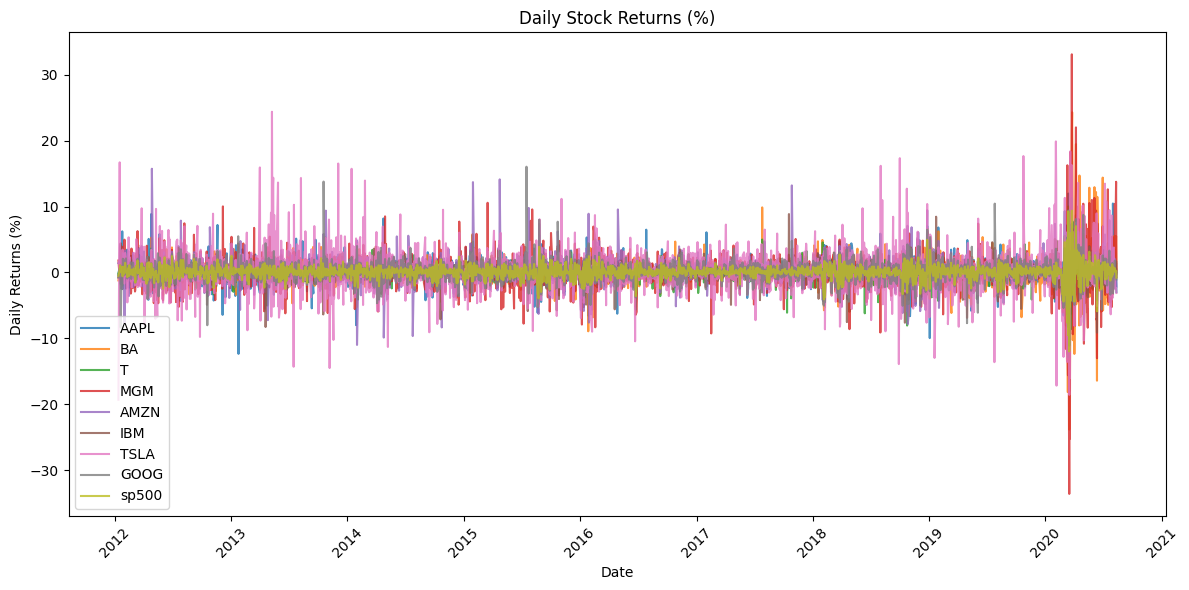

In [38]:
plot_daily_returns(df_daily_returns) 

### Calculate Daily Stock Returns 2

In [40]:
# Calculate the correlations between daily returns
correlation_matrix =  df_daily_returns.drop(columns='Date').corr()


print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

Correlation Matrix of Daily Returns:
           AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
AAPL   1.000000  0.385249  0.341373  0.384088  0.410233  0.434534  0.288534   
BA     0.385249  1.000000  0.401602  0.554229  0.267466  0.479264  0.250946   
T      0.341373  0.401602  1.000000  0.340166  0.233145  0.484219  0.152515   
MGM    0.384088  0.554229  0.340166  1.000000  0.309016  0.441631  0.311879   
AMZN   0.410233  0.267466  0.233145  0.309016  1.000000  0.339589  0.310083   
IBM    0.434534  0.479264  0.484219  0.441631  0.339589  1.000000  0.245610   
TSLA   0.288534  0.250946  0.152515  0.311879  0.310083  0.245610  1.000000   
GOOG   0.509124  0.388048  0.353695  0.439141  0.575283  0.458816  0.322804   
sp500  0.657320  0.641826  0.617463  0.631449  0.539560  0.703935  0.387920   

           GOOG     sp500  
AAPL   0.509124  0.657320  
BA     0.388048  0.641826  
T      0.353695  0.617463  
MGM    0.439141  0.631449  
AMZN   0.575283  0.539560  
IBM 

In [ ]:
# Heat Map
